In [1]:
import matplotlib.pyplot as plt
import numpy as np
import platform
import Slope_Regression as sr
import SIRD_Model as sird

### Calculate Slope of Infection Data Using Regression

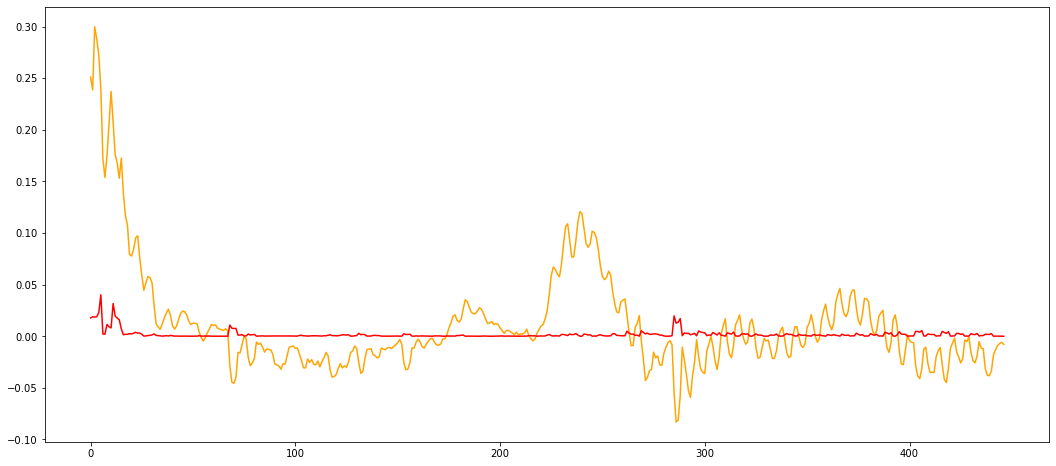

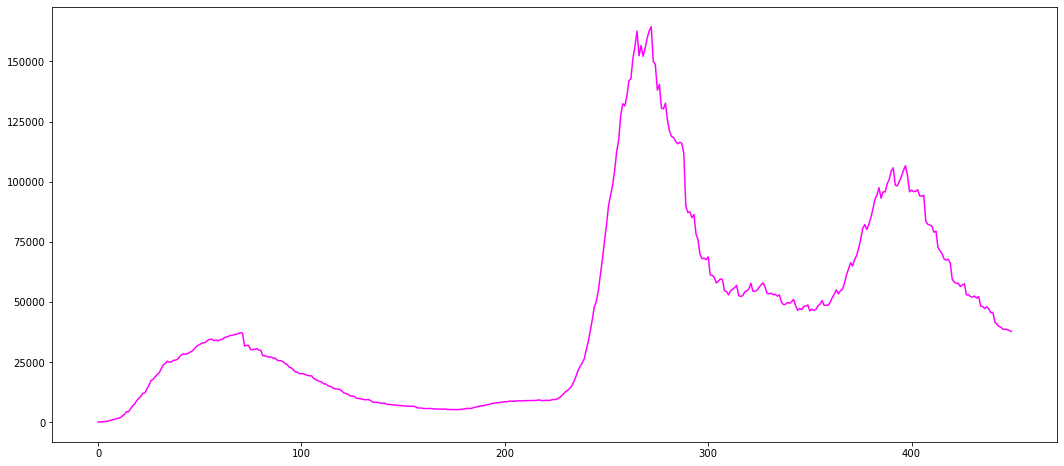

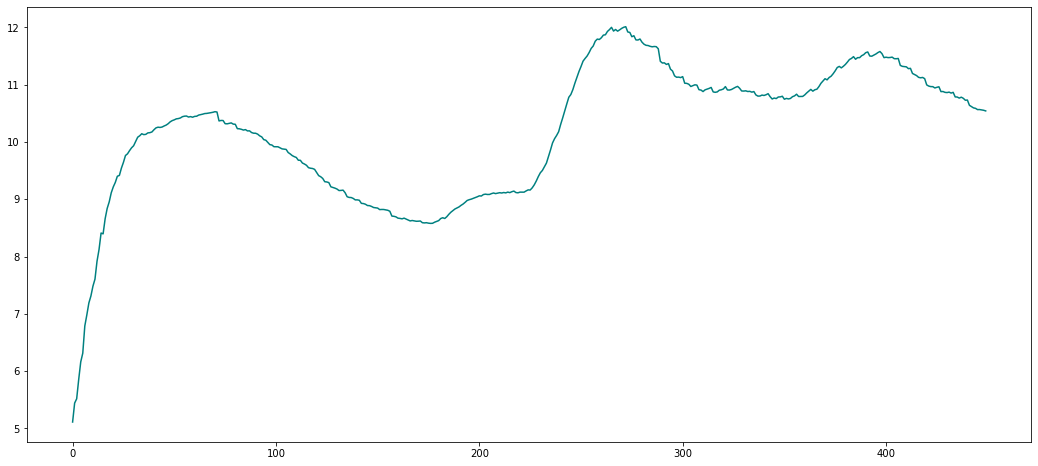

In [2]:

def showRegression(region, window, dir_path="../Data/Covid Tracking State Data/"):
    # modify the path syntax based on the current platform
    if platform.system() == "Windows":
        dir_path.replace("/", "\\")
        
    _, infected, _, _ = sird.loadData("{}{}.csv".format(dir_path, region))
    
    infected = np.array(infected)
    ln_infected = np.log(infected)

    slopes, errs = sr.regressionSlopeSeries(infected, 5)
    
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(slopes, color="orange", label="Infected Slope")
    ax.plot(errs, color="red", label="Residual")
    fig2, ax2 = plt.subplots(figsize=(18,8))
    ax2.plot(infected, color="magenta", label="Infected")
    fig3, ax3 = plt.subplots(figsize=(18,8))
    ax3.plot(ln_infected, color="teal", label="Log Infected")

showRegression("Lombardia", 5, "../Data/Italian Data/")

